In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.8 MB 5.0 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 182 kB 69.2 MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 7.6 MB 44.9 MB/s 


In [ ]:
!pip install keras-bert
!pip install keras-radam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33516 sha256=129badaa4f5bec01bf6652f98ccbca1d51a0020cfc5a4c2874e6c94c9a8cbeaa
  Stored in directory: /root/.cache/pip/wheels/a1/34/ed/6bbd71716d7bcea30d75e8bc5aeb94f4cb52636295c8343534
  Created wheel for keras-transformer: filename=keras_transformer-0.40.0-py3-none-any.whl size=12304 sha256=6660fc48618dce56d962e0d6c53e8f5a3feac0fa17fa65543283ca472f5a9e9d
  Stored in directory: /root/.cache/pip/wheels/07/cd/a7/a8fa93f7e177eee0101fed63179f7a2fa3b53671ffaad82bfd
  Created wheel for keras-embed-sim: filename=keras_embed_sim-0.10.0-py3-none-any.whl size=3959 sha256=e551aa169b97501e16442173df9c705781c0accb3b373ad9dd6751ecc448a4ef
  Stored in directory: /root/.cache/pip/wheels/59/bd/9a/ec6e575aaa50687d7af968bde7ce710b542eeaa9ee7978d4ba
  Created wheel for keras-layer-normalization: filename=keras_layer_normalizatio

In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 240 kB 5.0 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=cf84039a376129a8ba88129a5ad4b09bef2a8fbf642655b397e2118fa54f627e
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [ ]:
import tensorflow.keras as tf
import pandas as pd
import numpy as np  
import re
import pickle
import tensorflow.keras as keras
from tensorflow.keras.models import load_model
from tensorflow.keras import backend as K
from tensorflow.keras import Input, Model
from tensorflow.keras import optimizers

import codecs
from tqdm import tqdm
import shutil

In [ ]:
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import random
import os
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from tqdm.notebook import tqdm
from transformers import BertTokenizer
from transformers import BertModel
from torch.optim import Adam
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# Îã§Ïö¥ bert Î™®Ìòï Î∂àÎü¨Ïò¥
from keras_bert import load_trained_model_from_checkpoint, load_vocabulary
from keras_bert import Tokenizer
from keras_bert import AdamWarmup, calc_train_steps

from keras_radam import RAdam
import emoji

input : df['Utterance'] Î¨∏Ïû•Ïù¥ Îì§Ïñ¥Í∞ê

output : Í∞êÏ†ïÏ¢ÖÎ•òÍ∞Ä ÎÇòÏò¥

In [ ]:
# bert Ïù¥ÎØ∏ ÌïôÏäµÎêú Î™®Îç∏ÏûÑ
os.listdir('/content/drive/MyDrive/bert')

['vocab.txt',
 'bert_config.json',
 'bert_model.ckpt.data-00000-of-00001',
 'bert_model.ckpt.meta',
 'bert_model.ckpt.index',
 'bert1.h5']

In [ ]:
# bert Í≤ΩÎ°úÏßÄÏ†ïÌï¥Ï§å
path = "/content/drive/MyDrive/bert"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Ìè¥ÎçîÎ•º Î≥µÏÇ¨ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùò Bert Î™®Îç∏ÏùÄ GDrive Ïóê Ï°¥Ïû¨
# Colab ÌÅ¥ÎùºÏö∞Îìú Ïª¥Ìì®ÌÑ∞ ÏïàÏóê Bert Î™®ÌòïÏùÑ ÏßÅÏ†ë Ï†ÄÏû•ÌïòÎ©¥, GDRIVE Í≤ΩÏú† ÌïòÎäî Í≤ÉÎ≥¥Îã§ ÏÇ¨Ï†Ñ ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Î°úÎìúÌïòÎäî ÏãúÍ∞ÑÏù¥ Îã®Ï∂ï
def copytree(src, dst, symlinks = False, ignore = None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

In [ ]:
# Colab ÌÅ¥ÎùºÏö∞Îìú ÏÑúÎ≤ÑÏóê bertÎùºÎäî Ìè¥ÎçîÎ•º ÏÉùÏÑ±Ìï®
os.makedirs("bert")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/open/train.csv')

In [ ]:
x_train = df[['Utterance']]
# y_train = df['Target']Ïù∏ Í≤ΩÏö∞Ïóê ÏãúÎ¶¨Ï¶àÎ°ú ÎÇòÏò§Í∏∞ ÎïåÎ¨∏Ïóê df[[Target]]ÏúºÎ°ú ÌïòÏó¨ df ÌòïÌÉúÎ°ú Î∞îÍøîÏ§å
y_train = df.iloc[:,-1]

In [ ]:
# SEQ_LEN : Î¨∏Ïû•Ïùò ÏµúÎåÄ Í∏∏Ïù¥, Î¨∏Ïû•Î≥¥Îã§ Í∏∏Ïù¥Í∞Ä ÏûëÏïÑÏßÄÎ©¥ 0Ïù¥ Ï±ÑÏõåÏßÄÍ≥†, Î¨∏Ïû•Ïù¥ Í∏∏Îã§Î©¥  Ï¥àÍ≥ºÌïòÎäî Î∂ÄÎ∂ÑÏùÄ ÏûòÎùºÎÉÑ
# BATCH_SIZE : Î©îÎ™®Î¶¨ Ï¥àÍ≥º Í∞ôÏùÄ Î¨∏Ï†úÎ•º Î∞©ÏßÄÌïòÍ∏∞ ÏúÑÌï® 
# EPOCHSÏ¥ù ÌõàÎ†® ÏóêÌè¨ÌÅ¨ Ïàò 
# LR ÌïôÏäµÎ•†
# ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞

# bert Î™®ÌòïÏùò ÏÇ¨Ï†ÑÎ™®Îç∏
SEQ_LEN = 128 #ÌïúÍµ≠Ïñ¥Îäî 60 Ï†ïÎèÑ Îì§Ïñ¥Í∞ê
BATCH_SIZE = 16 # 16Î≥¥Îã§ ÌÅ¨Î©¥ Î©îÎ™®Î¶¨ Ïò§Î•òÍ∞Ä ÏùºÏñ¥ÎÇòÏÑú ÌïôÏäµÏù¥ ÌûòÎì§Îã§
EPOCHS = 4
LR = 1e-5

In [ ]:
path = ('/content/drive/MyDrive/bert')

pretrained_path = path
config_path = os.path.join(pretrained_path, 'bert_config.json')
checkpoint_path = os.path.join(pretrained_path, 'bert_model.ckpt')
vocab_path = os.path.join(pretrained_path, 'vocab.txt')

DATA_COLUMN = "Utterance"
LABEL_COLUMN = "Target"

In [ ]:
# Î™á Î≤àÏß∏Ïóê Îã®Ïñ¥Í∞Ä ÏúÑÏπòÌïòÎäîÏßÄ Ïù∏Îç±Ïã±ÏùÑ Íµ¨ÌòÑÌï®
# vocab.txtÏóê ÏûàÎäî Îã®Ïñ¥Ïóê Ïù∏Îç±Ïä§Î•º Ï∂îÍ∞ÄÌï¥Ï£ºÎäî token_dict ÎùºÎäî ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±Ìï®
# Î∂ÑÏÑùÌï† Î¨∏Ïû•Ïù¥ ÌÜ†ÌÅ∞ÌôîÎê®
# Í∑∏ Îã§Ïùå Ïù∏Îç±Ïä§(Ïà´Ïûê)Î°ú Î≥ÄÍ≤ΩÎêòÏñ¥ÏÑú Î≤ÑÌä∏ Ïã†Í≤ΩÎßùÏóê Ïù∏ÌíãÏúºÎ°ú Îì§Ïñ¥Í∞ê

#vocab.txtÎäî Îã®Ïñ¥Îì§ÏóêÎã§Í∞Ä Ïù∏Îç±Ïã±ÏùÑ Î∂ÄÏó¨ÏÑú ÏúÑÏπòÎ•º Ïïå Ïàò ÏûàÍ≤åÌï¥Ï§å
token_dict = {}
with codecs.open(vocab_path, 'r', 'utf8') as reader:
    for line in reader:
        token = line.strip()
        if "_" in token:
          token = token.replace("_","")
          token = "##" + token
        token_dict[token] = len(token_dict)

In [ ]:
# Î¨∏Ïû•ÏùÑ tokenize
# Ï†ÑÏ≤òÎ¶¨ 
class inherit_Tokenizer(Tokenizer):
  def _tokenize(self, text):
        if not self._cased:
            text = text
            
            text = text.lower()
        spaced = ''
        for ch in text:
            if self._is_punctuation(ch) or self._is_cjk_character(ch):
                spaced += ' ' + ch + ' '
            elif self._is_space(ch):
                spaced += ' '
            elif ord(ch) == 0 or ord(ch) == 0xfffd or self._is_control(ch):
                continue
            else:
                spaced += ch
        tokens = []
        for word in spaced.strip().split():
            tokens += self._word_piece_tokenize(word)
        return tokens

In [ ]:
tokenizer = inherit_Tokenizer(token_dict)

In [ ]:
# Îç∞Ïù¥ÌÑ∞Î•º Î≤ÑÌä∏ Î™®ÌòïÏùò ÏûÖÎ†•Ïóê ÎßûÍ≤å Î≥ÄÌòïÏùÑ Ìï¥Ï§òÏïº Ìï®
# convert_data Ìï®Ïàò Ï†ïÏùòÌï¥Ï§å
# pandas Îç∞Ïù¥ÌÑ∞Î•º input ÏúºÎ°ú Î∞õÏïòÏùå
def convert_data(data_df):
    global tokenizer
    indices, targets = [], []
    for i in tqdm(range(len(data_df))):
        ids, segments = tokenizer .encode(data_df[DATA_COLUMN][i], max_len = SEQ_LEN)
        indices.append(ids)
        targets.append(data_df[LABEL_COLUMN][i])
    items = list(zip(indices, targets))
    
    indices, targets = zip(*items)
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)], np.array(targets)

def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_x, data_y = convert_data(data_df)
    
    return data_x, data_y

In [ ]:
x_train, y_train =load_data(df)

  0%|          | 0/9989 [00:00<?, ?it/s]

In [ ]:
# LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
model.fit(y_train)
y_train = model.transform(y_train)
y_train

array([4, 4, 4, ..., 6, 4, 3])

In [ ]:
# ÎùºÎ≤®Ïù∏ÏΩîÎî©Îêú ÏàúÏÑú 
model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness',
       'surprise'], dtype='<U8')

In [ ]:
# 9989 Î¨∏Ïû•Í∞úÏàò
np.array(x_train).shape

In [ ]:
x_train1 = np.array(x_train)
x_train1[0] 
x_train1[1]
# x_train1 = x_train1.reshape(2,9989,128)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_train.shape

In [ ]:
# x_train = df[['Utterance']]
# y_train = df.iloc[:,-1]
from sklearn.model_selection import train_test_split

In [ ]:
# ÏÇ¨Ïã§ÏÉÅ y_trainÏùÄ Ìïú Î≤àÎßå ÎÇòÎàà Í≤ÉÏûÑ
X_train_token, X_test_token, Y_train, Y_test = train_test_split(x_train1[0], y_train, random_state = 42, test_size = 0.2)
# y_trainÏùÑ ÎÇòÎàÑÏßÄÎßå Îî∞Î°ú Î≥ÄÏàòÎ•º ÏÑ§Ï†ïÌïòÏßÄÎäî ÏïäÏùå
X_train_seg, X_test_seg, _, _ = train_test_split(x_train1[1], y_train, random_state = 42, test_size = 0.2)
# X_train_seg, X_test_seg, Y_train, Y_test = train_test_split(x_train1[1], y_train, random_state = 42, test_size = 0.2)
X_train = np.array([X_train_token, X_train_seg]) #8000
X_test = np.array([X_test_token, X_test_seg]) # 2000

In [ ]:
print(X_train[0].shape)
print(X_train[1].shape)

In [ ]:
# ERROR Found input variables with inconsistent numbers of samples: [7991, 6392] Î≥ÄÏàòÎ™Ö
Y_train0 = Y_train

In [ ]:
# Y_train[6392] , Y_train [7991]
# Y_train[] , Y_train[6392]
X_train_token, X_val_token, Y_train, Y_val = train_test_split(X_train[0], Y_train0, random_state = 42, test_size = 0.2)
X_train_seg, X_val_seg, Y_train, Y_val = train_test_split(X_train[1], Y_train0, random_state = 42, test_size = 0.2)

X_train = np.array([X_train_token, X_train_seg ])
X_val = np.array([X_val_token, X_val_seg])

In [ ]:
X_train = list(X_train)
X_val = list(X_val)
X_test = list(X_test)

In [ ]:
model.classes_

In [ ]:
import emoji
emoji_map = {
     4 : ("\U0001F611", "\U0001F610","\U0001F636","\U0001F644"),
     6 : ("\U0001F632", "\U0001F633","\U0001F440", "\U0001F648 "),
      2 : ("\U0001F631", "\U0001F628","\U0001F627", "\U0001F92F"),
      5 : ("\U0001F622", "\U0001F62D", "\U0001F63F", '\U0001F625'),
      3 : ("\U0001F601", "\U0001F970", "\U0001F603", "\U0001F606"),
      1 : ("\U0001F922", "\U0001F635", "\U0001F623","\U0001F635"),
      0 : ("\U0001F621", "\U0001F47F", "\U0001F624","\U0001F620")
}
def label_to_emoji(label):
    return print(emoji_map[label])

In [ ]:
print(emoji_map[0])
print(emoji_map[1])
print(emoji_map[2])
print(emoji_map[3])
print(emoji_map[4])
print(emoji_map[5])
print(emoji_map[6])

('üò°', 'üëø', 'üò§', 'üò†')
('ü§¢', 'üòµ', 'üò£', 'üòµ')
('üò±', 'üò®', 'üòß', 'ü§Ø')
('üòÅ', 'ü•∞', 'üòÉ', 'üòÜ')
('üòë', 'üòê', 'üò∂', 'üôÑ')
('üò¢', 'üò≠', 'üòø', 'üò•')
('üò≤', 'üò≥', 'üëÄ', 'üôà ')


In [ ]:
# Î∞îÎ°ú Î¨∏Ïû•ÏùÑ Î∞õÏïÑÏÑú ÌÜ†ÌÅ∞Ìôî Ìï¥Ï£ºÍ≥† ÌÜ†ÌÅ∞Ïóê Ïù∏Îç±Ïä§ÎèÑ Ìï¥Ï£ºÍ≥† ÏÑ∏Í∑∏Î®ºÌä∏ÎèÑ Ìï¥Ï§å
def sentence_convert_data(data):
    global tokenizer
    indices = []
    for i in tqdm(range(len(data))):
        print(tokenizer.tokenize(data[i]))
        ids, segments = tokenizer.encode(data[i], max_len = SEQ_LEN)
        indices.append(ids)
        
    items = indices
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

# sentenceÎäî ListÎ°ú Î∞õÎäîÎã§
def sentence_load_data(sentences):
    data_x = sentence_convert_data(sentences)
    return data_x

In [ ]:
# ÏÇ¨Ï†ÑÌïôÏäµÎêú Î™®Îç∏,  bert Î™®Îç∏ÏùÑ Î∂àÎü¨Ïò¥
layer_num = 12
model = load_trained_model_from_checkpoint(
    config_path,
    checkpoint_path,
    training = True,
    trainable = True,
    seq_len = SEQ_LEN,
)

In [ ]:
model.summary()

In [ ]:
def get_bert_finetuning_model(model):
    inputs = model.inputs[:2]
    dense = model.layers[-3].output
    outputs = keras.layers.Dense(7, activation ='softmax', kernel_initializer = keras.initializers.TruncatedNormal(stddev=0.02))(dense)
    bert_model = keras.models.Model(inputs, outputs)
    bert_model.compile(
        optimizer = tfa.optimizers.RectifiedAdam(learning_rate = 0.00001, weight_decay = 0.0025),
        loss = 'sparse_categorical_crossentropy', metrics = ['accuracy']
    )
    return bert_model

In [ ]:
pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.1 MB 17.6 MB/s 


In [ ]:
import tensorflow_addons as tfa
tfa.optimizers.RectifiedAdam()

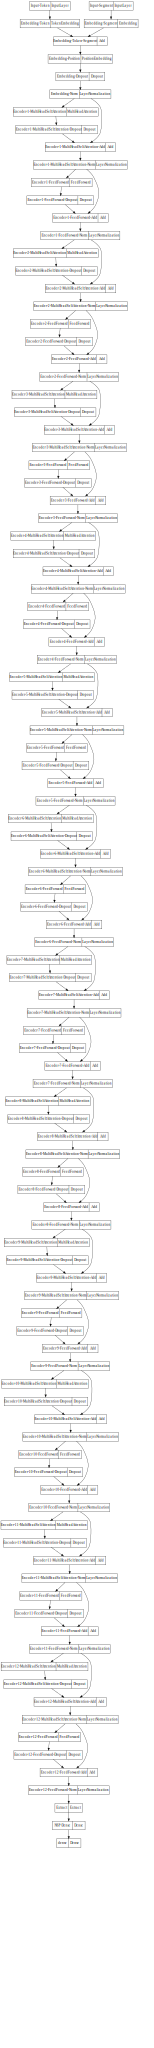

In [ ]:
from IPython.display import SVG
from keras.utils import model_to_dot


SVG(model_to_dot(get_bert_finetuning_model(model), dpi=65).create(prog='dot', format='svg'))

In [ ]:
bert = get_bert_finetuning_model(model)
bert.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input-Token (InputLayer)       [(None, 128)]        0           []                               
                                                                                                  
 Input-Segment (InputLayer)     [(None, 128)]        0           []                               
                                                                                                  
 Embedding-Token (TokenEmbeddin  [(None, 128, 768),  91812096    ['Input-Token[0][0]']            
 g)                              (119547, 768)]                                                   
                                                                                                  
 Embedding-Segment (Embedding)  (None, 128, 768)     1536        ['Input-Segment[0][0]']    

In [ ]:
import tensorflow
import keras.backend as K
K.clear_session()
import tensorflow.keras.backend as K
from tensorflow.python.keras.backend import get_session

In [ ]:
tf.compat.v1.keras.backend.set_session(session)
tf.compat.v1.keras.backend.set_session()
K.set_session
tf.compat.v1.Session()

In [ ]:
tf.__version__

In [ ]:
# !apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

In [ ]:
with tensorflow.compat.v1.Session() as sess:
    uninitialized_variables = set([i.decode('ascii') for i in sess.run(tensorflow.compat.v1.report_uninitialized_variables())])
    init = tensorflow.compat.v1.variables_initializer([v for v in tensorflow.compat.v1.global_variables() if v.name.split(':')[0] in uninitialized_variables])
    sess.run(init)

bert_model = get_bert_finetuning_model(model)
history = bert_model.fit(X_train, Y_train, epochs = 10, batch_size = 16, verbose = 1, shuffle=False, validation_data = (X_val, Y_val))
bert_model.save_weights(path + "/bert1.h5")

Epoch 1/10
400/400 [==============================] - 275s 580ms/step - loss: 1.4955 - accuracy: 0.4851 - val_loss: 1.3341 - val_accuracy: 0.5391
Epoch 2/10
400/400 [==============================] - 227s 569ms/step - loss: 1.2472 - accuracy: 0.5887 - val_loss: 1.2229 - val_accuracy: 0.5922
Epoch 3/10
400/400 [==============================] - 227s 568ms/step - loss: 1.1326 - accuracy: 0.6339 - val_loss: 1.2156 - val_accuracy: 0.5979
Epoch 4/10
400/400 [==============================] - 227s 568ms/step - loss: 1.0203 - accuracy: 0.6738 - val_loss: 1.2349 - val_accuracy: 0.6041
Epoch 5/10
400/400 [==============================] - 227s 568ms/step - loss: 0.8999 - accuracy: 0.7128 - val_loss: 1.3117 - val_accuracy: 0.5897
Epoch 6/10
400/400 [==============================] - 227s 568ms/step - loss: 0.7622 - accuracy: 0.7642 - val_loss: 1.3765 - val_accuracy: 0.5641
Epoch 7/10
400/400 [==============================] - 227s 567ms/step - loss: 0.6314 - accuracy: 0.8066 - val_loss: 1.4857 -

In [ ]:
def sentence_convert_data(data):
    global tokenizer
    indices = []
    ids, segments = tokenizer.encode(data, max_len=SEQ_LEN)
    indices.append(ids)
        
    items = indices
    indices = np.array(indices)
    return [indices, np.zeros_like(indices)]

In [ ]:
def emoji_prediction(sentence):
    data_x = sentence_convert_data(sentence)
    predict = bert_model.predict(data_x)
    # predict_answer = np.round(predict.flatten(), 0).item()
    # argmax Ï†úÏùº ÎÜíÏùÄ ÌôïÎ•†Í∞íÏùÑ Í∞ÄÏ†∏Îã§Ï§å
    predict_index = np.argmax(predict, axis =1)[0]
    # return label_to_emoji([int(i) for i in predict_index])
    # return [int(i) for i in predict_index]
    return predict_index

    print(predict)
    # print([int(i) for i in predict])

In [ ]:
label_to_emoji(emoji_prediction("I love you"))

1/1 [==============================] - 0s 41ms/step
('üòÅ', 'ü•∞', 'üòÉ', 'üòÜ')


In [ ]:
label_to_emoji(emoji_prediction("I hate you"))

1/1 [==============================] - 0s 44ms/step
('ü§¢', 'üòµ', 'üò£', 'üòµ')


In [ ]:
label_to_emoji(emoji_prediction("I'm so blue"))

1/1 [==============================] - 0s 195ms/step
('üòë', 'üòê', 'üò∂', 'üôÑ')


In [ ]:
label_to_emoji(emoji_prediction("I'm so sad"))

1/1 [==============================] - 0s 42ms/step
('üòë', 'üòê', 'üò∂', 'üôÑ')


In [ ]:
label_to_emoji(emoji_prediction("scared"))

1/1 [==============================] - 0s 43ms/step
('üò°', 'üëø', 'üò§', 'üò†')


In [ ]:
label_to_emoji(emoji_prediction("happy"))

1/1 [==============================] - 0s 53ms/step
('üòÅ', 'ü•∞', 'üòÉ', 'üòÜ')


In [ ]:
label_to_emoji(emoji_prediction("disgusted"))

1/1 [==============================] - 0s 56ms/step
('üò¢', 'üò≠', 'üòø', 'üò•')


In [ ]:
label_to_emoji(emoji_prediction("hurt"))

1/1 [==============================] - 0s 40ms/step
('üò°', 'üëø', 'üò§', 'üò†')
